# Anant Pandey
# Task 1 :
# Prediction using Supervise ML
# Predict Percentage Of Student Based On Number Of Study Hours *

### Linear regression with python Scikit Learn
### We will start with simple linear regression involving two variables.
### Simple Linear Regression In this regression task we will predict the percentage of marks that a student is expected to score based om the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [2]:
#Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Reading Data from remote link
url = "http://bit.ly/w-data"    
data = pd.read_csv(url)
print("Data imported succesfully")

Data imported succesfully


## To check the missing values

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### To generate descriptive statistics

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### DATA VISUALIZATION

Let's plot our datapoints on 2-D graph to eyeball our datasetand see if we can manually find any relationship between the data. We can create the plot with the following script :

In [7]:
x = data['Hours']
y = data['Scores']

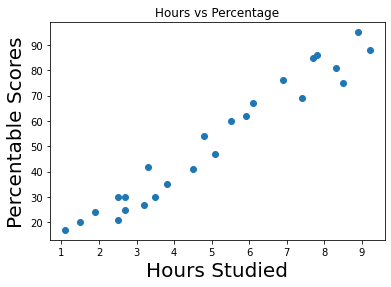

In [8]:
plt.scatter(x,y)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied',fontsize=20)
plt.ylabel('Percentable Scores',fontsize=20)
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### LINEAR REGRESSION MODEL

#### Preparing the data

In [10]:
x = data.iloc[:, :-1].values
y = data.iloc[:,1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method :

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=0)

### TRAINING THE ALGORITHM

We have split our data into training and testing sets, and now will train our algorithm

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Training Complete")

Training Complete


In [14]:
#Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

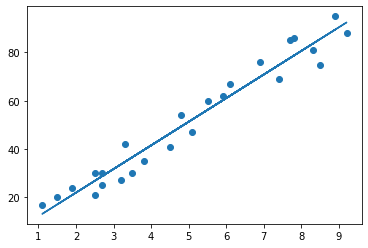

In [15]:
#Plotting for test
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

In [16]:
print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [17]:
#comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [18]:
print("Training Score ",regressor.score(x_train,y_train))
print("Testing Score ", regressor.score(x_test,y_test))

Training Score  0.9484997422695115
Testing Score  0.9568211104435257


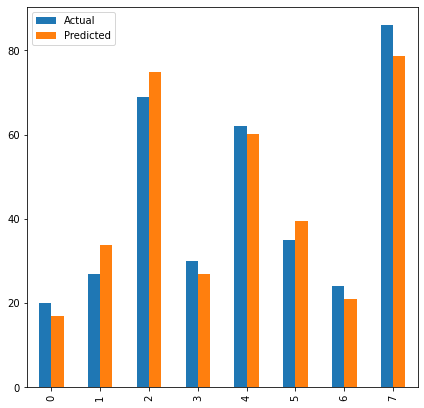

In [19]:
#plotting the bar chart to depict the actual and predicted value
df.plot(kind = 'bar', figsize = (7,7))
plt.show()

In [20]:
#prediction for 9.25 hr
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No.of hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No.of hours = 9.25
Predicted Score = 92.91505723477056


### EVALUATING THE MODEL

In [21]:
import numpy as np
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squareed Error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Explained Variance Score: ",metrics.explained_variance_score(y_test,y_pred))

Mean Absolute Error:  4.419727808027651
Mean Squareed Error:  22.965097212700428
Root Mean Squared Error:  4.7921912746363144
Explained Variance Score:  0.9568649952899161


### PREDICTING THE SCORE

In [22]:
hours = float(input("Enter the number of hours : "))
percentage = regressor.predict([[hours]])
print("Predicted percentage :",percentage)

Enter the number of hours : 9.25
Predicted percentage : [92.91505723]
